# Molecular graphics in Jupyter

Download PDB structure to visualize:

In [1]:
!wget https://files.rcsb.org/download/1jug.pdb

--2022-05-03 15:37:30--  https://files.rcsb.org/download/1jug.pdb
Распознаётся files.rcsb.org (files.rcsb.org)... 128.6.158.49
Подключение к files.rcsb.org (files.rcsb.org)|128.6.158.49|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK
Длина: нет данных [application/octet-stream]
Сохранение в каталог: ««1jug.pdb.1»».

1jug.pdb.1              [   <=>              ] 112,72K   213KB/s    за 0,5s    

2022-05-03 15:37:32 (213 KB/s) - «1jug.pdb.1» сохранён [115425]



In [2]:
name = 'lysozyme'
file = '1jug.pdb'

## 1. Biopython and nglview

https://github.com/nglviewer/nglview \
https://biopython.org/wiki/The_Biopython_Structural_Bioinformatics_FAQ

Examples: https://github.com/nglviewer/nglview/tree/master/examples/notebooks

1. Install `biopython` and `nglview`:

In [ ]:
!pip install nglview
# or using conda:
#!conda install nglview -c conda-forge
!pip install biopython

2. Create the structure object from PDB file:

In [3]:
# PDB structure parser
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure(name, file)

3. Visualize:

In [ ]:
# run this cell if you use Colab
from google.colab import output
output.enable_custom_widget_manager()

In [4]:
import nglview as nv
view = nv.show_biopython(structure)
view

NGLWidget()

## 2. py3Dmol

https://github.com/3dmol/3Dmol.js \
https://3dmol.csb.pitt.edu/index.html

Examples: https://colab.research.google.com/drive/1T2zR59TXyWRcNxRgOAiqVPJWhep83NV_?usp=sharing

In [ ]:
!pip install py3Dmol

In [5]:
with open(file) as f:
    structure = ''.join([i for i in f])

In [6]:
import py3Dmol
view = py3Dmol.view()
view.addModelsAsFrames(structure)
view.setStyle({"cartoon": {'color': 'spectrum'}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## 3. PyMol

Non-interactive visualization.

Download https://pymol.org/2/ or install via conda: `conda install -c schrodinger pymol-bundle` \
Edu license: https://pymol.org/edu/ \
Launching remote PyMol: https://pymolwiki.org/index.php/RPC

1. Launch PyMol with the "-R" option to start the RPC server: `pymol -R`
2. Connect to PyMol in Jupyter:

In [22]:
import xmlrpc.client as xmlrpclib
cmd = xmlrpclib.ServerProxy('http://localhost:9123')

In [23]:
cmd.load(file)
cmd.show_as('cartoon')

imgfile = 'img.png'
cmd.ray(512,384)
cmd.save(imgfile,'.png')

1

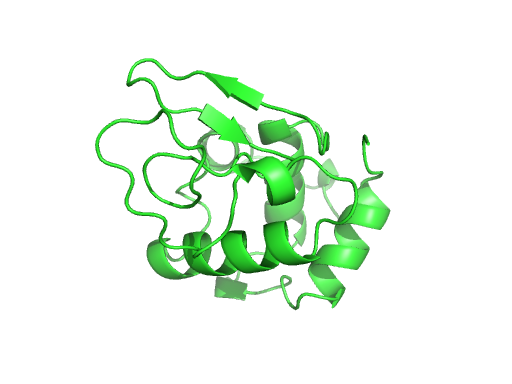

In [24]:
from IPython.display import Image
Image(filename=imgfile)

Another example: https://notebook.community/BioContainers/containers/pymol-jupiter/1.0.0/ipymol/iPyMol_example